# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [2]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [4]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(*) 
    FROM Products 
    WHERE Price < 10;
""")

rows = cursor.fetchall()
print(rows)

[(11,)]


#### Total products with price less than €10 is 11

### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [5]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(*) AS SupplierCount
    FROM Suppliers
    GROUP BY Country
    ORDER BY SupplierCount DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


#### Most frequent country by supplier is USA with 4 suppliers

/var/folders/sy/1sg_81796bv64wn36_fj5h3h0000gn/T/ipykernel_11359/3316691732.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='SupplierCount', y='Country', palette='viridis')


Text(0, 0.5, 'Country')

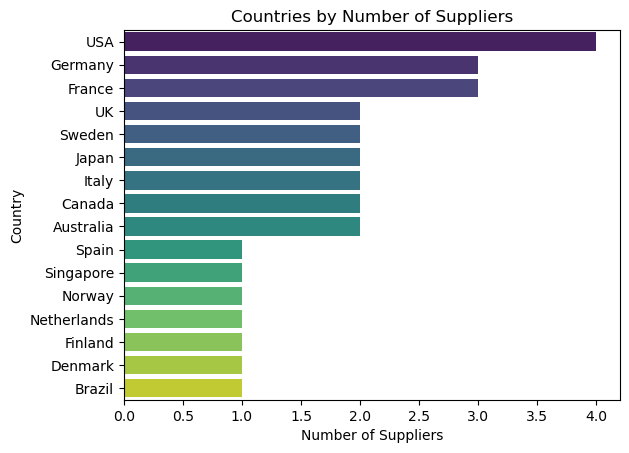

In [6]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'SupplierCount'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x='SupplierCount', y='Country', palette='viridis')
plt.title('Countries by Number of Suppliers')
plt.xlabel('Number of Suppliers')
plt.ylabel('Country')

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [7]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(*) AS CustomerCount
    FROM Customers
    GROUP BY Country
    ORDER BY CustomerCount DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


/var/folders/sy/1sg_81796bv64wn36_fj5h3h0000gn/T/ipykernel_11359/3658134669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='CustomerCount', y='Country', palette='coolwarm')


Text(0, 0.5, 'Country')

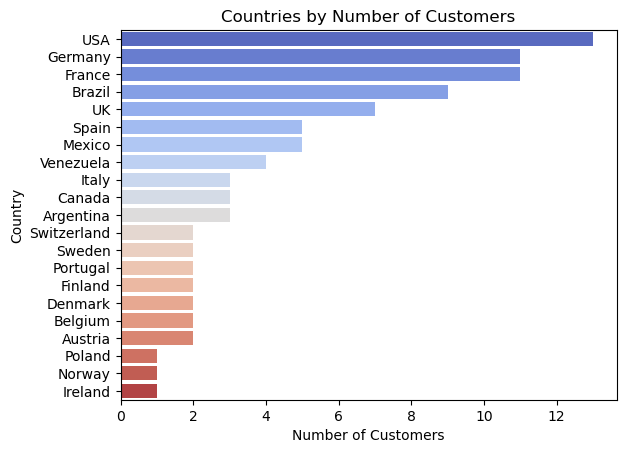

In [8]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'CustomerCount'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x='CustomerCount', y='Country', palette='coolwarm')
plt.title('Countries by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')

#### USA is the most common country of origin in our Customers table with 13 customers being from USA

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [26]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT P.ProductName, SUM(OD.Quantity) AS TotalQuantity
    FROM OrderDetails OD
    JOIN Products P ON OD.ProductID = P.ProductID
    GROUP BY P.ProductName
    ORDER BY TotalQuantity ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]


/var/folders/sy/1sg_81796bv64wn36_fj5h3h0000gn/T/ipykernel_54697/1840505566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='TotalQuantity', y='ProductName', palette='viridis')


Text(0, 0.5, 'Product Name')

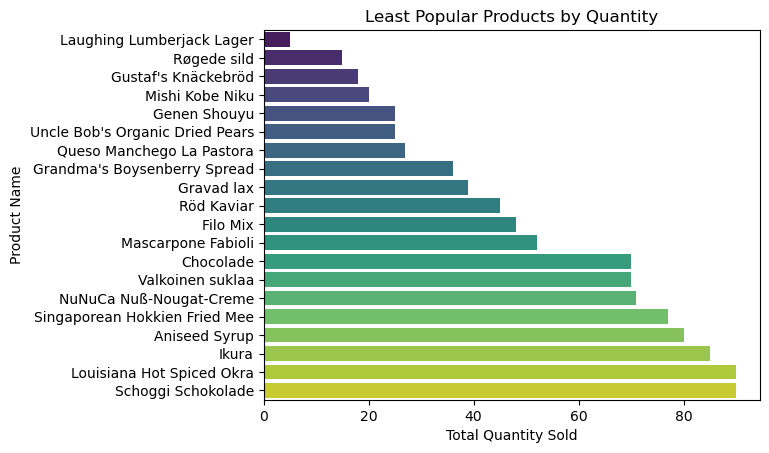

In [30]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'TotalQuantity'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x='TotalQuantity', y='ProductName', palette='viridis')
plt.title('Least Popular Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')

#### The least popular products by order quantity is Laughing Lumberjack Lager

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [9]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT P.ProductName, SUM(OD.Quantity * P.Price) AS TotalRevenue
    FROM OrderDetails OD
    JOIN Products P ON OD.ProductID = P.ProductID
    GROUP BY P.ProductName
    ORDER BY TotalRevenue ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5)]


/var/folders/sy/1sg_81796bv64wn36_fj5h3h0000gn/T/ipykernel_11359/590256370.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='TotalRevenue', y='ProductName', palette='viridis')


Text(0, 0.5, 'Product Name')

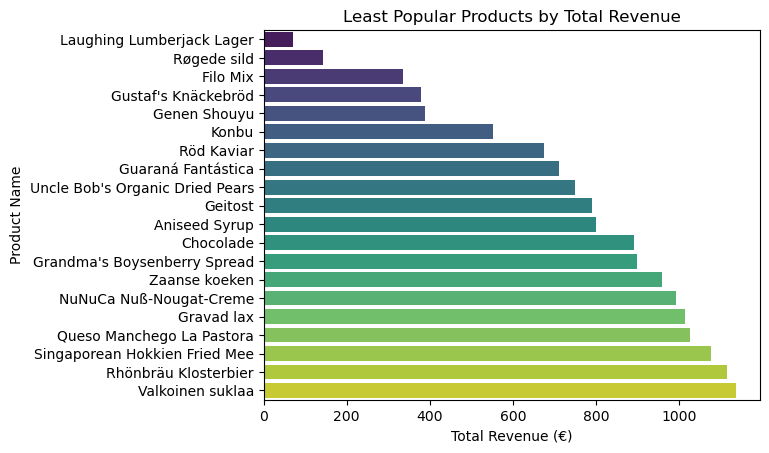

In [10]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'TotalRevenue'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x='TotalRevenue', y='ProductName', palette='viridis')
plt.title('Least Popular Products by Total Revenue')
plt.xlabel('Total Revenue (€)')
plt.ylabel('Product Name')

#### The least popular products by total revenue is Laughing Lumberjack Lager which make sense it has less orders(18) compare to others

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [11]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT C.Country, COUNT(O.CustomerID) AS OrderCount
    FROM 'Orders' O
    JOIN Customers C ON O.CustomerID = C.CustomerID
    GROUP BY C.Country
    ORDER BY OrderCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1), ('Argentina', 1)]


/var/folders/sy/1sg_81796bv64wn36_fj5h3h0000gn/T/ipykernel_11359/4187169044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='OrderCount', y='Country', palette='viridis')


Text(0, 0.5, 'Country')

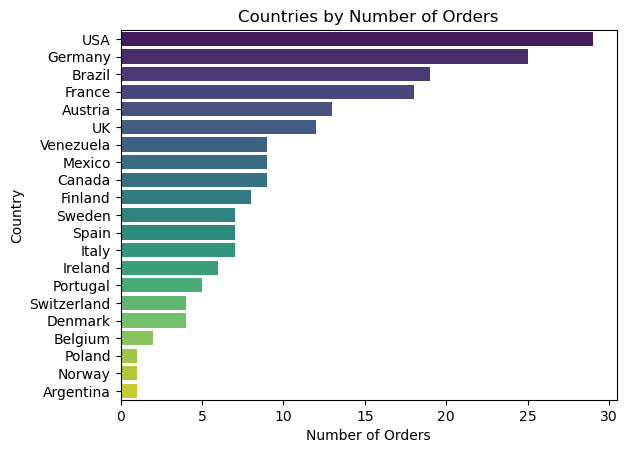

In [12]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'OrderCount'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x='OrderCount', y='Country', palette='viridis')
plt.title('Countries by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Country')

#### Customers from USA has placed the most orders such as 29.

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [54]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT C.Country, COUNT(C.CustomerID) AS ZeroOrderCustomerCount
    FROM Customers C
    LEFT JOIN 'Orders' O ON C.CustomerID = O.CustomerID
    WHERE O.CustomerID IS NULL
    GROUP BY C.Country
    ORDER BY ZeroOrderCustomerCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)]


/var/folders/sy/1sg_81796bv64wn36_fj5h3h0000gn/T/ipykernel_54697/4234346131.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='InactiveCustomerCount', y='Country', palette='viridis')


Text(0, 0.5, 'Country')

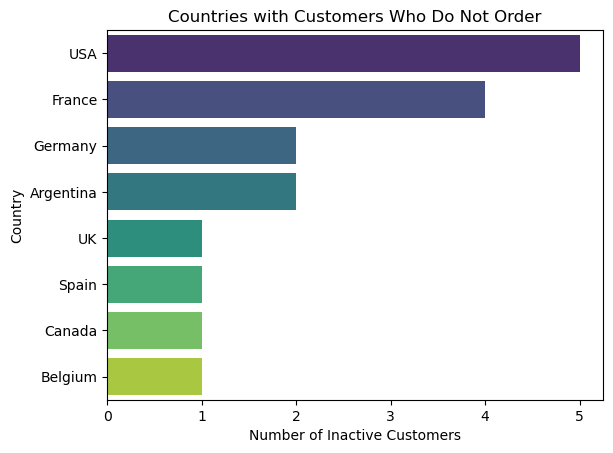

In [56]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'InactiveCustomerCount'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x='InactiveCustomerCount', y='Country', palette='viridis')
plt.title('Countries with Customers Who Do Not Order')
plt.xlabel('Number of Inactive Customers')
plt.ylabel('Country')

#### USA have 5 customers who has placed no orders while France has 4 and Germany has 2.

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [67]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT S.SupplierName, COUNT(OD.OrderID) AS OrderCount
    FROM Suppliers S
    JOIN Products P ON S.SupplierID = P.SupplierID
    JOIN OrderDetails OD ON P.ProductID = OD.ProductID
    GROUP BY S.SupplierName
    ORDER BY OrderCount DESC
    LIMIT 10;

""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19)]


/var/folders/sy/1sg_81796bv64wn36_fj5h3h0000gn/T/ipykernel_54697/3671117201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='OrderCount', y='CompanyName', palette='magma')


Text(0, 0.5, 'Supplier Name')

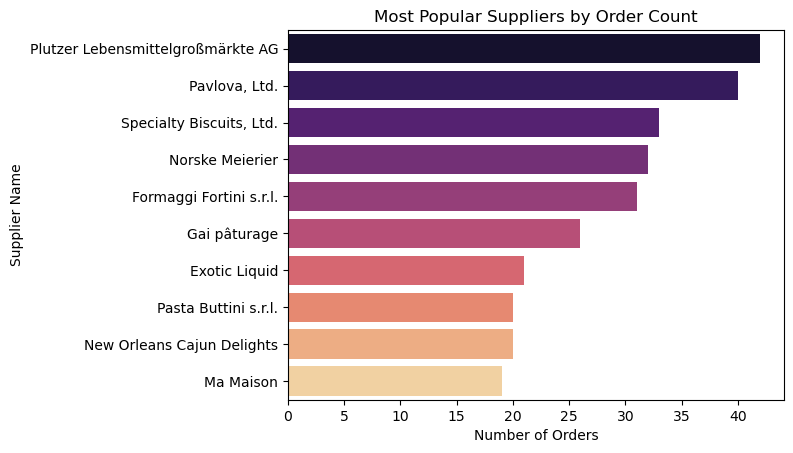

In [68]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['CompanyName', 'OrderCount'])

# TODO: Generate a visualization on this dataframe
sns.barplot(data=df, x='OrderCount', y='CompanyName', palette='magma')
plt.title('Most Popular Suppliers by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Supplier Name')

#### Plutzer Lebensmittelgroßmärkte AG is the most popular supplier according to order count of 42. Then, Pavlova, Ltd. has 40, Specialty Biscuits, Ltd. has 33 and Norske Meierier has 32.

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

USA have the greatest number of customers which is 13 customers and USA also had the largest numbers of suppliers which is 4. 

It clearly shows that more customers lead to more suppliers since the company need more suppliers to quickly fullfill the demand of the customers.

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

The least popular products by order quantity is Laughing Lumberjack Lager which only has 5 orders whereas the most popular product, Schoggi Schokolade, has 90 orders. 

The least popular products by total revenue is Laughing Lumberjack Lager which only made 70 and make sense it has less orders(5) compare to others. 

It shows that less popular products by quantity lead to less revenue.

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

Customers from USA has placed the most orders such as 29.

USA have 5 customers who has placed no orders while France has 4 and Germany has 2.

Countries with more ordering customers have more non-ordering customers becuase these countries have more customers which increase number of inactive customers compare to other countries which do not have that much overall customer numbers.

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

Plutzer Lebensmittelgroßmärkte AG is the most popular supplier according to order count of 42. Then, Pavlova, Ltd. has 40, Specialty Biscuits, Ltd. has 33 and Norske Meierier has 32.